In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [4]:
def random_walker_2D(N: int=1000, px=0.5, py=0.5):
    """
    Takes a positive integer number of steps as N (default 1000) and returns two arrays:
    one for the x axis and one for the y axis. The arrays show the path taken by a random walker
    that takes +1 or -1 step in the x and y directions, respectively.

    N: number of steps (equal number of steps in the x and y directions)

    px: probability of taking a step in the +x direction

    py: probability of taking a step in the +y direction
    """


    x_position = np.cumsum((2 * (np.random.random(N) < px) - 1))
    y_position = np.cumsum((2 * (np.random.random(N) < py) - 1))
    return x_position, y_position

$\Large Generating \ Data \ for \ R_g \ = \ \sqrt{\langle x^2 + y^2 \rangle} \sim t^\nu$

In [146]:
"""
Generating the path for 5000 random walker samples. Snapshots will be taken of each random walker
as time goes on, and its position will be recorded 500 times (num_snapshots).
Then the square of its distance from the origin (AKA its radius of gyration) in
those snapshots will be calculated, and will be put in radii_of_gyration.
"""


# Takes 6 seconds.
num_samples = 5000
num_snapshots = 500
N = 100_000
# This mask is essentially boolean indexing and will choose certain elements
# in random walker position as snapshots of that random walker.
mask = np.array(range(1, N+1))%(N//num_snapshots) == 0
radii_of_gyration = np.zeros((num_samples, num_snapshots))
for i in range(num_samples):
    # Generate one random walker:
    rw_position = random_walker_2D(N=N)
    # Calculate its square of radius of gyration in certain intervals of time:
    radii_of_gyration[i,:] = ((rw_position[0][mask])**2 + (rw_position[1][mask])**2)


# Take the mean first, and then the square root:
radius_of_gyration = np.sqrt(np.mean(radii_of_gyration, axis=0))

$\Large Plotting \ for \ \log_{10}{(R_g)} \sim \nu \log_{10}{(t)}$

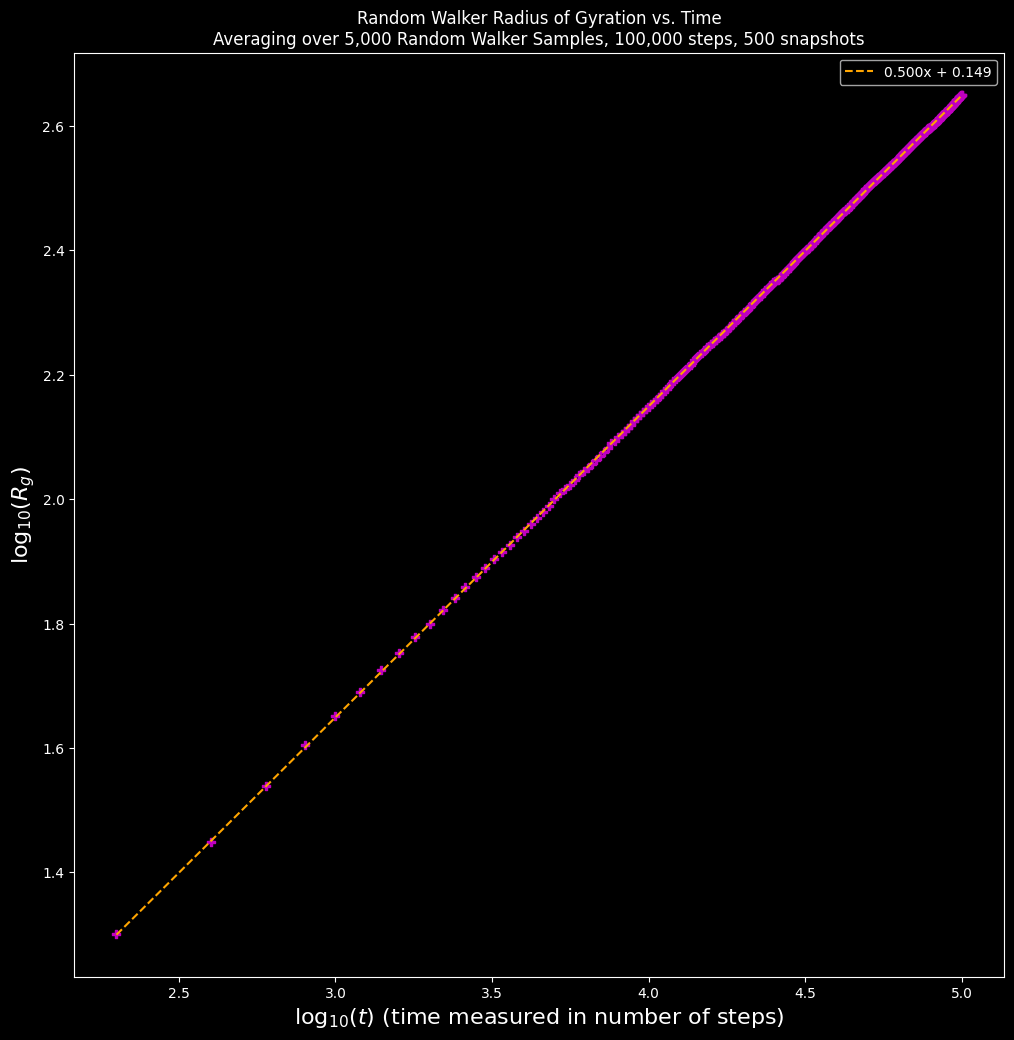

In [147]:
"""
Plotting:
"""


# The x axis is basically the times when the snapshots were taken:
xs = np.log10(np.array(range(1, N+1))[mask])
ys = np.log10(radius_of_gyration)

fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(xs, ys, marker="P", color="m")

coeffs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coeffs)
ax.plot(xs, ffit, label=f"{coeffs[1]:.3f}x + {coeffs[0]:.3f}", color="orange", linestyle="--")

ax.set_title("Random Walker Radius of Gyration vs. Time\nAveraging over 5,000 Random Walker Samples, \
100,000 steps, 500 snapshots")
ax.set_xlabel("$\log_{10}{(t)}$ (time measured in number of steps)", fontsize=16)
ax.set_ylabel("$\log_{10}{(R_g)}$", fontsize=16)
ax.legend();

In [143]:
# fig.savefig("Exercise4_5.jpg")

$\Large An \ Animation \ of \ a \ 2D \ Random \ Walk$

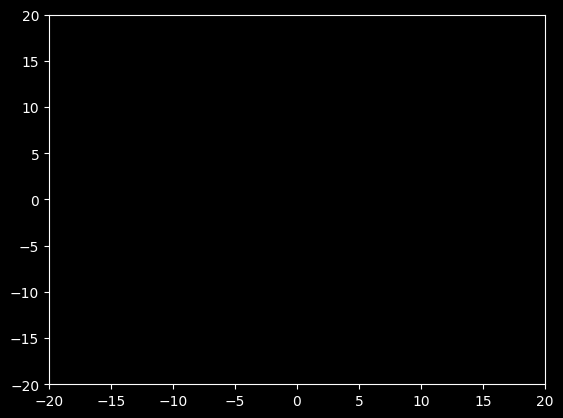

In [39]:
""" Make a movie out of the steps of a two-dimensional random walk. """

from matplotlib import animation
# Added the line below from stackoverflow so that jupyter would work (FFMpeg encoder not installed)
plt.rcParams["animation.html"] = "jshtml"


# Set number of steps for the random walk
N = 100

# Create an empty figure of the desired size.
# Be mindful of the number of steps so as not to fall out of the figure bounds.
bound = 20
fig, ax = plt.subplots()
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
# plt.axis("equal")

# Create empty line and point objects with no data.
# They will be updated during each frame of the animation.
(line,) = ax.plot([], [], linewidth=2, color="aqua") # Line to show path
(point,) = ax.plot([], [], "ro", ms=9)

# Generate the random walk data.
rw = random_walker_2D(N=N)
x_position = rw[0]
y_position = rw[1]

# This function will generate each frame of the animation.
# It adds all of the data through frame N to a line
# and moves a point to the nth position of the walk.
def get_step(N, x, y, line, point):
    line.set_data(x[:N+1], y[:N+1])
    point.set_data(x[N], y[N])


# Call the animator and create the movie.
anim = animation.FuncAnimation(fig, get_step, frames=N, fargs=(x_position, y_position, line, point));

In [40]:
# Takes 3 seconds for N=100 random walk steps
anim

In [42]:
# # Saves the animation in mp4.
# dpi = 300
# writer = animation.writers["ffmpeg"](fps=2)
# anim.save("RW100Steps.mp4", writer=writer,dpi=dpi)

In [ ]:
# # Saves the animation in gif:
# writergif = animation.PillowWriter(fps=2)
# anim.save("RW100Steps.gif",writer=writergif)